In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


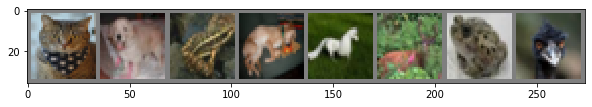

       cat      dog     frog      dog    horse     deer     frog     bird


In [4]:
batch_size = 64
subset_size = 1000
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)

# testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam', num_epochs=3, log_every=4, plot=True)

Loading BokehJS ...

In [6]:
solver.train()

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,         4]    2.30306262 |        0.10937500
[    1,         8]    2.28696150 |        0.12890625
[    1,        12]    2.28488994 |        0.10546875
[    1,        16]    2.26084489 |        0.12500000
----------------------------------------------------
[    1,  finished]     accuracy: |        0.12710000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,         4]    2.27907872 |        0.12890625
[    2,         8]    2.24332726 |        0.12500000
[    2,        12]    2.18152082 |        0.21484375
[    2,        16]    2.17961109 |        0.17031250
----------------------------------------------------
[    2,  finished]     accuracy: |        0.16590000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    3,         4]    2.09935820 |        0.

In [7]:
solver.data_shader_print_plots()

Loading BokehJS ...

In [8]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

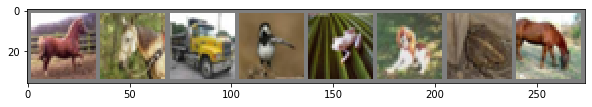

      Real:    horse    horse    truck     bird     frog      dog     frog    horse
 Predicted:    truck      car    truck     deer      car      dog     deer    truck


In [9]:
solver.predict_samples(classes)

In [10]:
solver.print_class_accuracies(classes)

Accuracy of plane : 36 %
Accuracy of   car : 20 %
Accuracy of  bird :  0 %
Accuracy of   cat : 16 %
Accuracy of  deer : 52 %
Accuracy of   dog :  7 %
Accuracy of  frog :  0 %
Accuracy of horse :  9 %
Accuracy of  ship : 50 %
Accuracy of truck : 50 %


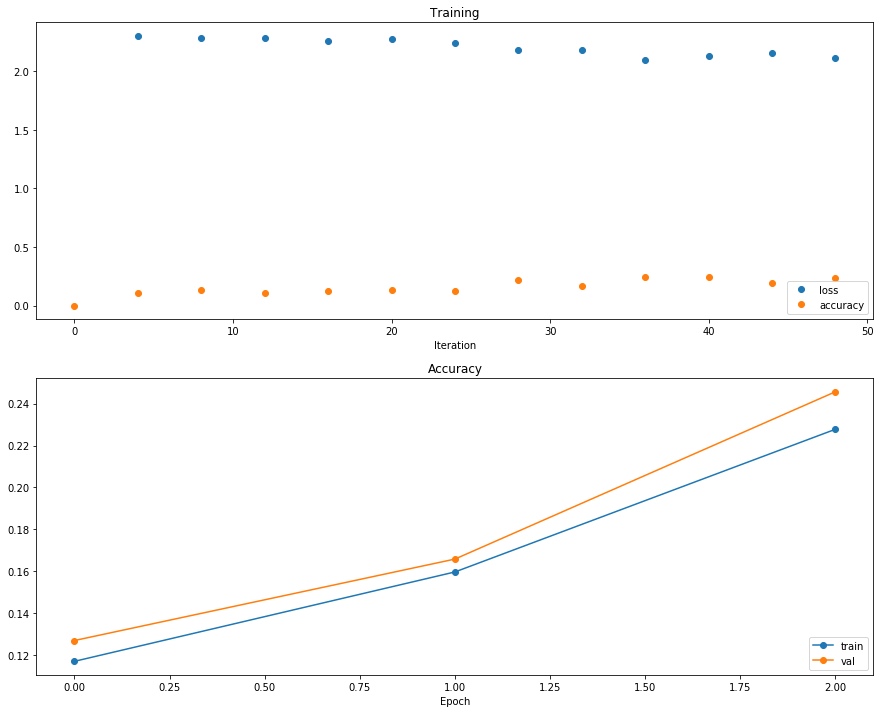

In [11]:
solver.print_plots()

In [12]:
import time
import numpy as np
# ------------------- new cell ---------------------#

from bokeh.models.sources import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
# ------------------- new cell ---------------------#

output_notebook()
# ------------------- new cell ---------------------#

my_figure = figure(plot_width=800, plot_height=400)
test_data = ColumnDataSource(data=dict(x=[0], y=[0]))
line = my_figure.line("x", "y", source=test_data)
handle = show(my_figure, notebook_handle=True)

new_data=dict(x=[0], y=[0])
x = []
y = []

step = 0
step_size = 0.1  # increment for increasing step
max_step = 10  # arbitrary stop point for example
period = .1  # in seconds (simulate waiting for new data)
n_show = 10  # number of points to keep and show
while step < max_step:
    x.append(step)
    y.append(np.random.rand())
    new_data['x'] = x = x[-n_show:]  # prevent filling ram
    new_data['y'] = y = y[-n_show:]  # prevent filling ram

    test_data.stream(new_data, n_show)

    push_notebook(handle=handle)
    step += step_size
    time.sleep(period)

Loading BokehJS ...